# Scatter Artist

In this example notebook, we show how to create a scatter plot using the `Scatter` class. The `Scatter` class is a subclass of the `Artist` class.

It has a simplified interface for creating scatter plots and updating some of its properties, like assigning different classes to points and displaying them with different colors based on a categorical colormap.

It can be imported like shown below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from biaplotter.artists import Scatter

## Creating a Scatter Plot

To create an empty scatter plot, just instanciate the `Scatter` class and provide an axes object as an argument.

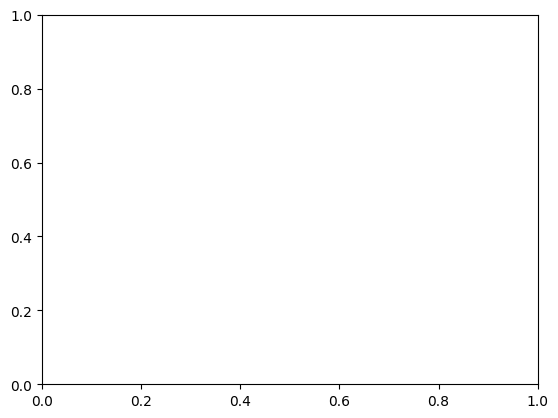

In [2]:
fig, ax = plt.subplots()
scatter = Scatter(ax)

## Adding Data to the Scatter Artist

To add data to the scatter plot, just feed the property `data` with a (N, 2) shaped numpy array. The plot gets updated automatically every time one of its properties is changed.

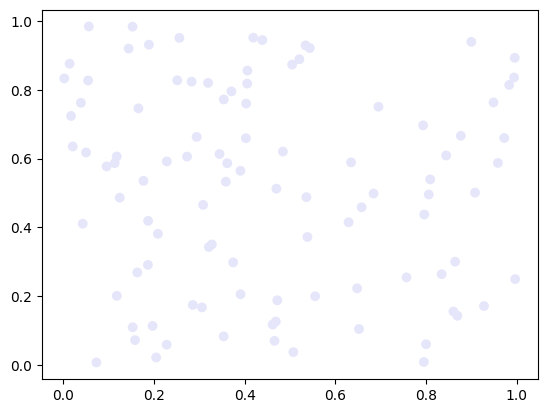

In [3]:
n_samples = 100
data = np.random.rand(n_samples, 2)
scatter.data = data
fig # show the updated figure

## Assigning Classes to Data Points

The `Scatter` artist comes with a custom categorical colormap, which can be used to assign different classes to points.

You can access the scatter current categorical colormap via its private `_colormap` attribute.

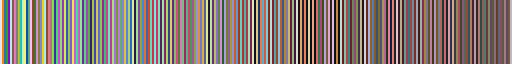

In [4]:
scatter.categorical_colormap

To assign classes to points, just feed the property `color_indices` with a (N,) shaped numpy array containing integers. These integers will be used as indices to the colormap.

Below, we randomly color the points with the 5 first colors of the scatter default colormap (light gray is the default color with color index 0).

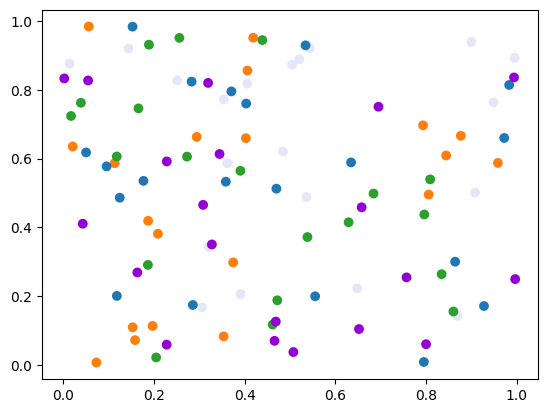

In [5]:
color_indices = np.linspace(start=0, stop=5, num=n_samples, endpoint=False, dtype=int)
scatter.color_indices = color_indices
fig

Colors are kept if new data is added.

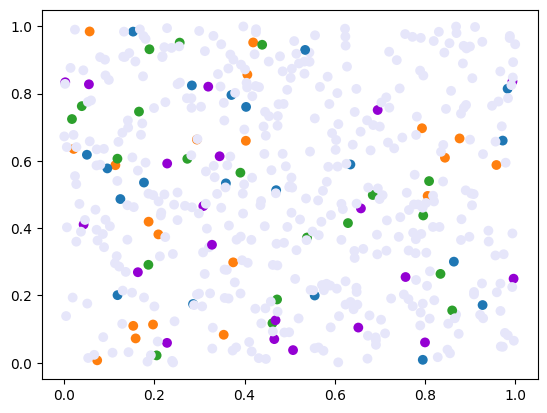

In [6]:
# Adding 400 more samples
n_samples = 400
data = np.concatenate([data, np.random.rand(n_samples, 2)])
scatter.data = data
fig

Set `color_indices` to `0` to reset the colors.

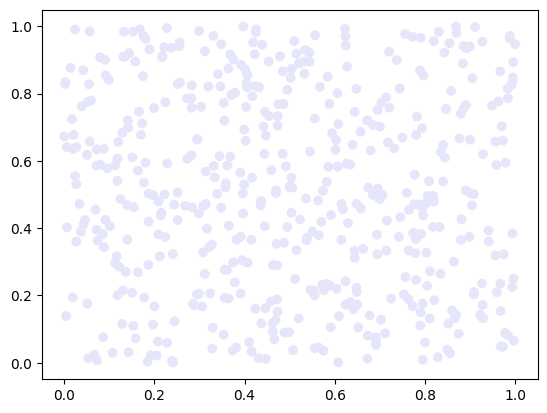

In [7]:
scatter.color_indices = 0
fig

## Setting point properties

You can also set other properties of the points, like their transparency. This is mediated through the `alpha` property. In this case, we set the transparency of the points according to the respective point's x coordinate, so we should observe a transparency gradient from left to right.

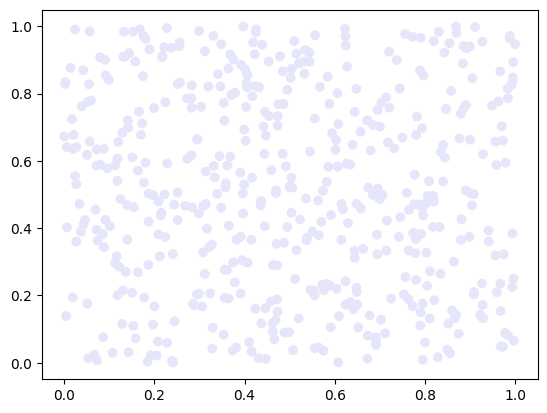

In [8]:
alpha = data[:, 0]
alpha = (alpha - alpha.min()) / (alpha.max() - alpha.min())
scatter.alpha = alpha
fig

You can also set the sizes of the points (values around ~50 are typically a good starting point):

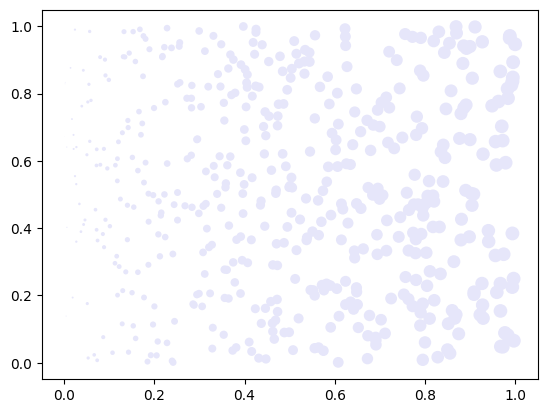

In [14]:
size = data[:, 0] * 100
scatter.size = size
fig

## Scatter Visibility

Optionally, hide/show the artist by setting the `visible` attribute.

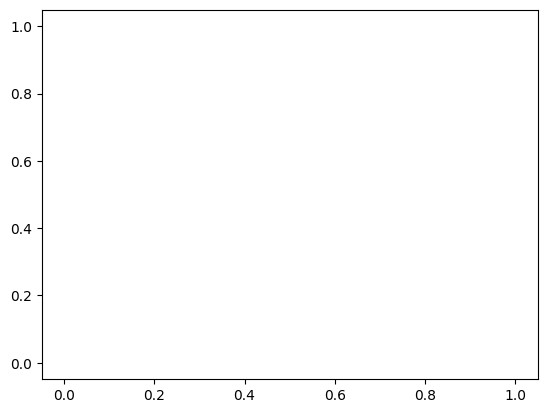

In [9]:
scatter.visible = False
fig

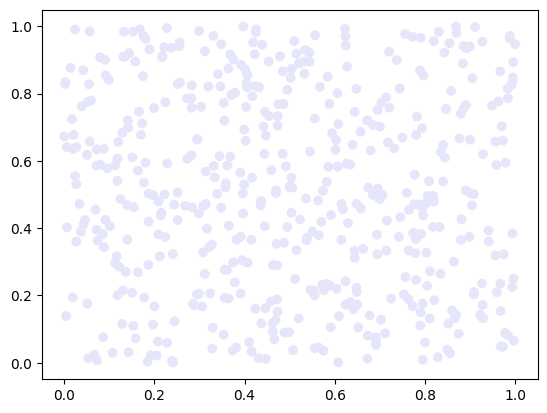

In [10]:
scatter.visible = True
fig